# End to End Machine Learning Project

    Steps to build any ML model

    1. Understanding the Problem / Look at the big Picture
    2. Get the Data
    3. Exploratory Data Analysis to Gain Insights from data
    4. Prepare Data for Machine Learning Algorithms 
    5. Select a Model and Train it
    6. Fine Tune your model
    7. Present your Solution
    8. Launch, Monitor, and Maintain your system

### 1. Look at The Big Picture



    our target is to predict house prices, It is a supervise problem as we have house prices and features in dataset

    currently we have a team experts which estimates house prices and we use them further to make a decision about investment

    it seems expert predictions are 30% off than actual pricess like they a house is workth 10k than it might possible that house either costs 7k or 13k 

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from urllib import request
import os
import tarfile

In [3]:
def head(filepath, n=5, encoding='utf-8'):
    with open(filepath, encoding=encoding) as file:
        for _ in range(n):
            print(file.readline(), end="")

In [5]:
!pwd

/Users/sachin/Data/Grras Solution Pvt. Ltd/AIML_KIIT_may_2024 - Live Class 📺/Class Code/machine_learning


compress & decompress  

    .zipfile  - backup.zip, folder.zip  (windows compress file)
    .tarfile - backup.gz, backup.tgz, backup.bz2, backup.tar (linux compress files)

## 2. Get Data

In [8]:
# download and extract housing data in datasets folder
def get_housing_data():
    dir_path = Path('datasets/')
    file_path = Path('datasets/housing.tgz')
    url = "https://github.com/sachinyadav3496/handson-ml2/raw/master/datasets/housing/housing.tgz"
    if not dir_path.exists():
        # if folder doesn't exists create one
        os.mkdir(dir_path)
    if not file_path.exists():
        request.urlretrieve(url, file_path)
        with tarfile.open(file_path) as file:
            file.extractall(dir_path)
        print("Dowload and Extraction is complete!")
    else:
        print("Data already exists so skipping download and extraction!")
    
    df = pd.read_csv(Path("datasets/housing.csv"))
    df['ocean_proximity'] = df['ocean_proximity'].astype('category')
    return df
    


In [10]:
housing = get_housing_data()

Dowload and Extraction is complete!


In [12]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


### 3. EDA on data

In [27]:
# downloading california image
request.urlretrieve(
    'https://github.com/sachinyadav3496/handson-ml2/raw/master/images/end_to_end_project/california.png',
    'datasets/california.png')

('datasets/california.png', <http.client.HTTPMessage at 0x173d4b750>)

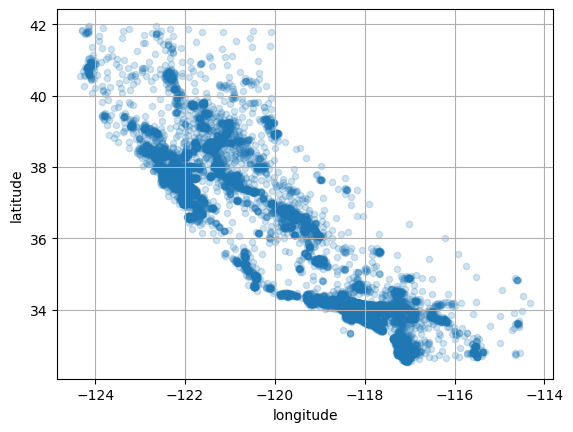

In [35]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True)
plt.show()

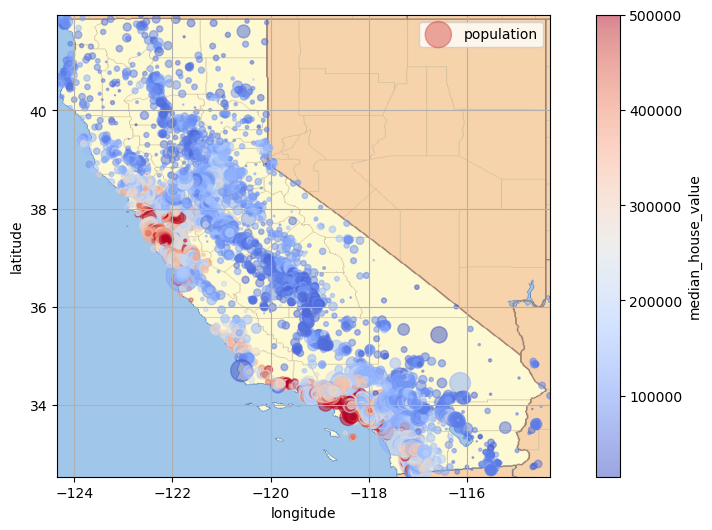

In [83]:
housing.plot(kind='scatter', x='longitude', y='latitude', c='median_house_value',
             s=housing['population']/50, cmap='coolwarm', 
             alpha=0.5, grid=True, figsize=(12, 6), label='population')



#axis = (xmin, xmax, ymin, ymax)
axis = (
    housing.longitude.min(), housing.longitude.max(),
    housing.latitude.min(), housing.latitude.max() )

img = plt.imread("datasets/california.png")
plt.imshow(img, extent=axis)
plt.show()

In [85]:
housing.ocean_proximity.unique()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [89]:
color = dict(zip(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], ['r', 'g', 'b', 'c', 'm']))

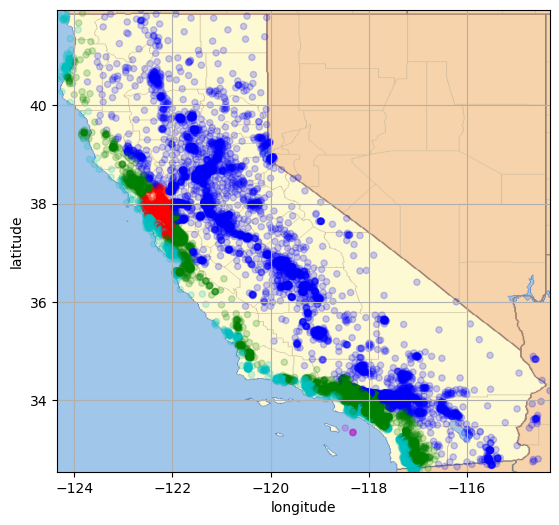

In [97]:
housing.plot(kind='scatter', x='longitude', y='latitude', c=housing.ocean_proximity.map(color), 
             alpha=0.2, grid=True, figsize=(12, 6))



#axis = (xmin, xmax, ymin, ymax)
axis = (
    housing.longitude.min(), housing.longitude.max(),
    housing.latitude.min(), housing.latitude.max() )

img = plt.imread("datasets/california.png")
plt.imshow(img, extent=axis)
plt.show()

In [99]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [103]:
from warnings import filterwarnings
filterwarnings(action='ignore')

## Let's see correlation between features

# Co-variance 

    measures combine variablity of two features together 

$$Cov(X,Y) = \frac {\sum_{i} {  (x_i - \bar x)(y_i - \bar y)}} {m}$$

## Correlation

    when two variables depends on each other like if changing one variable will change second variable than are considered correlated

    r

$$Corr(X,Y) = \frac {\sum_{i} {  (x_i - \bar x)(y_i - \bar y)}} {\sigma_x \sigma_y}$$

    range between -1 to 1

![correlation](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png)

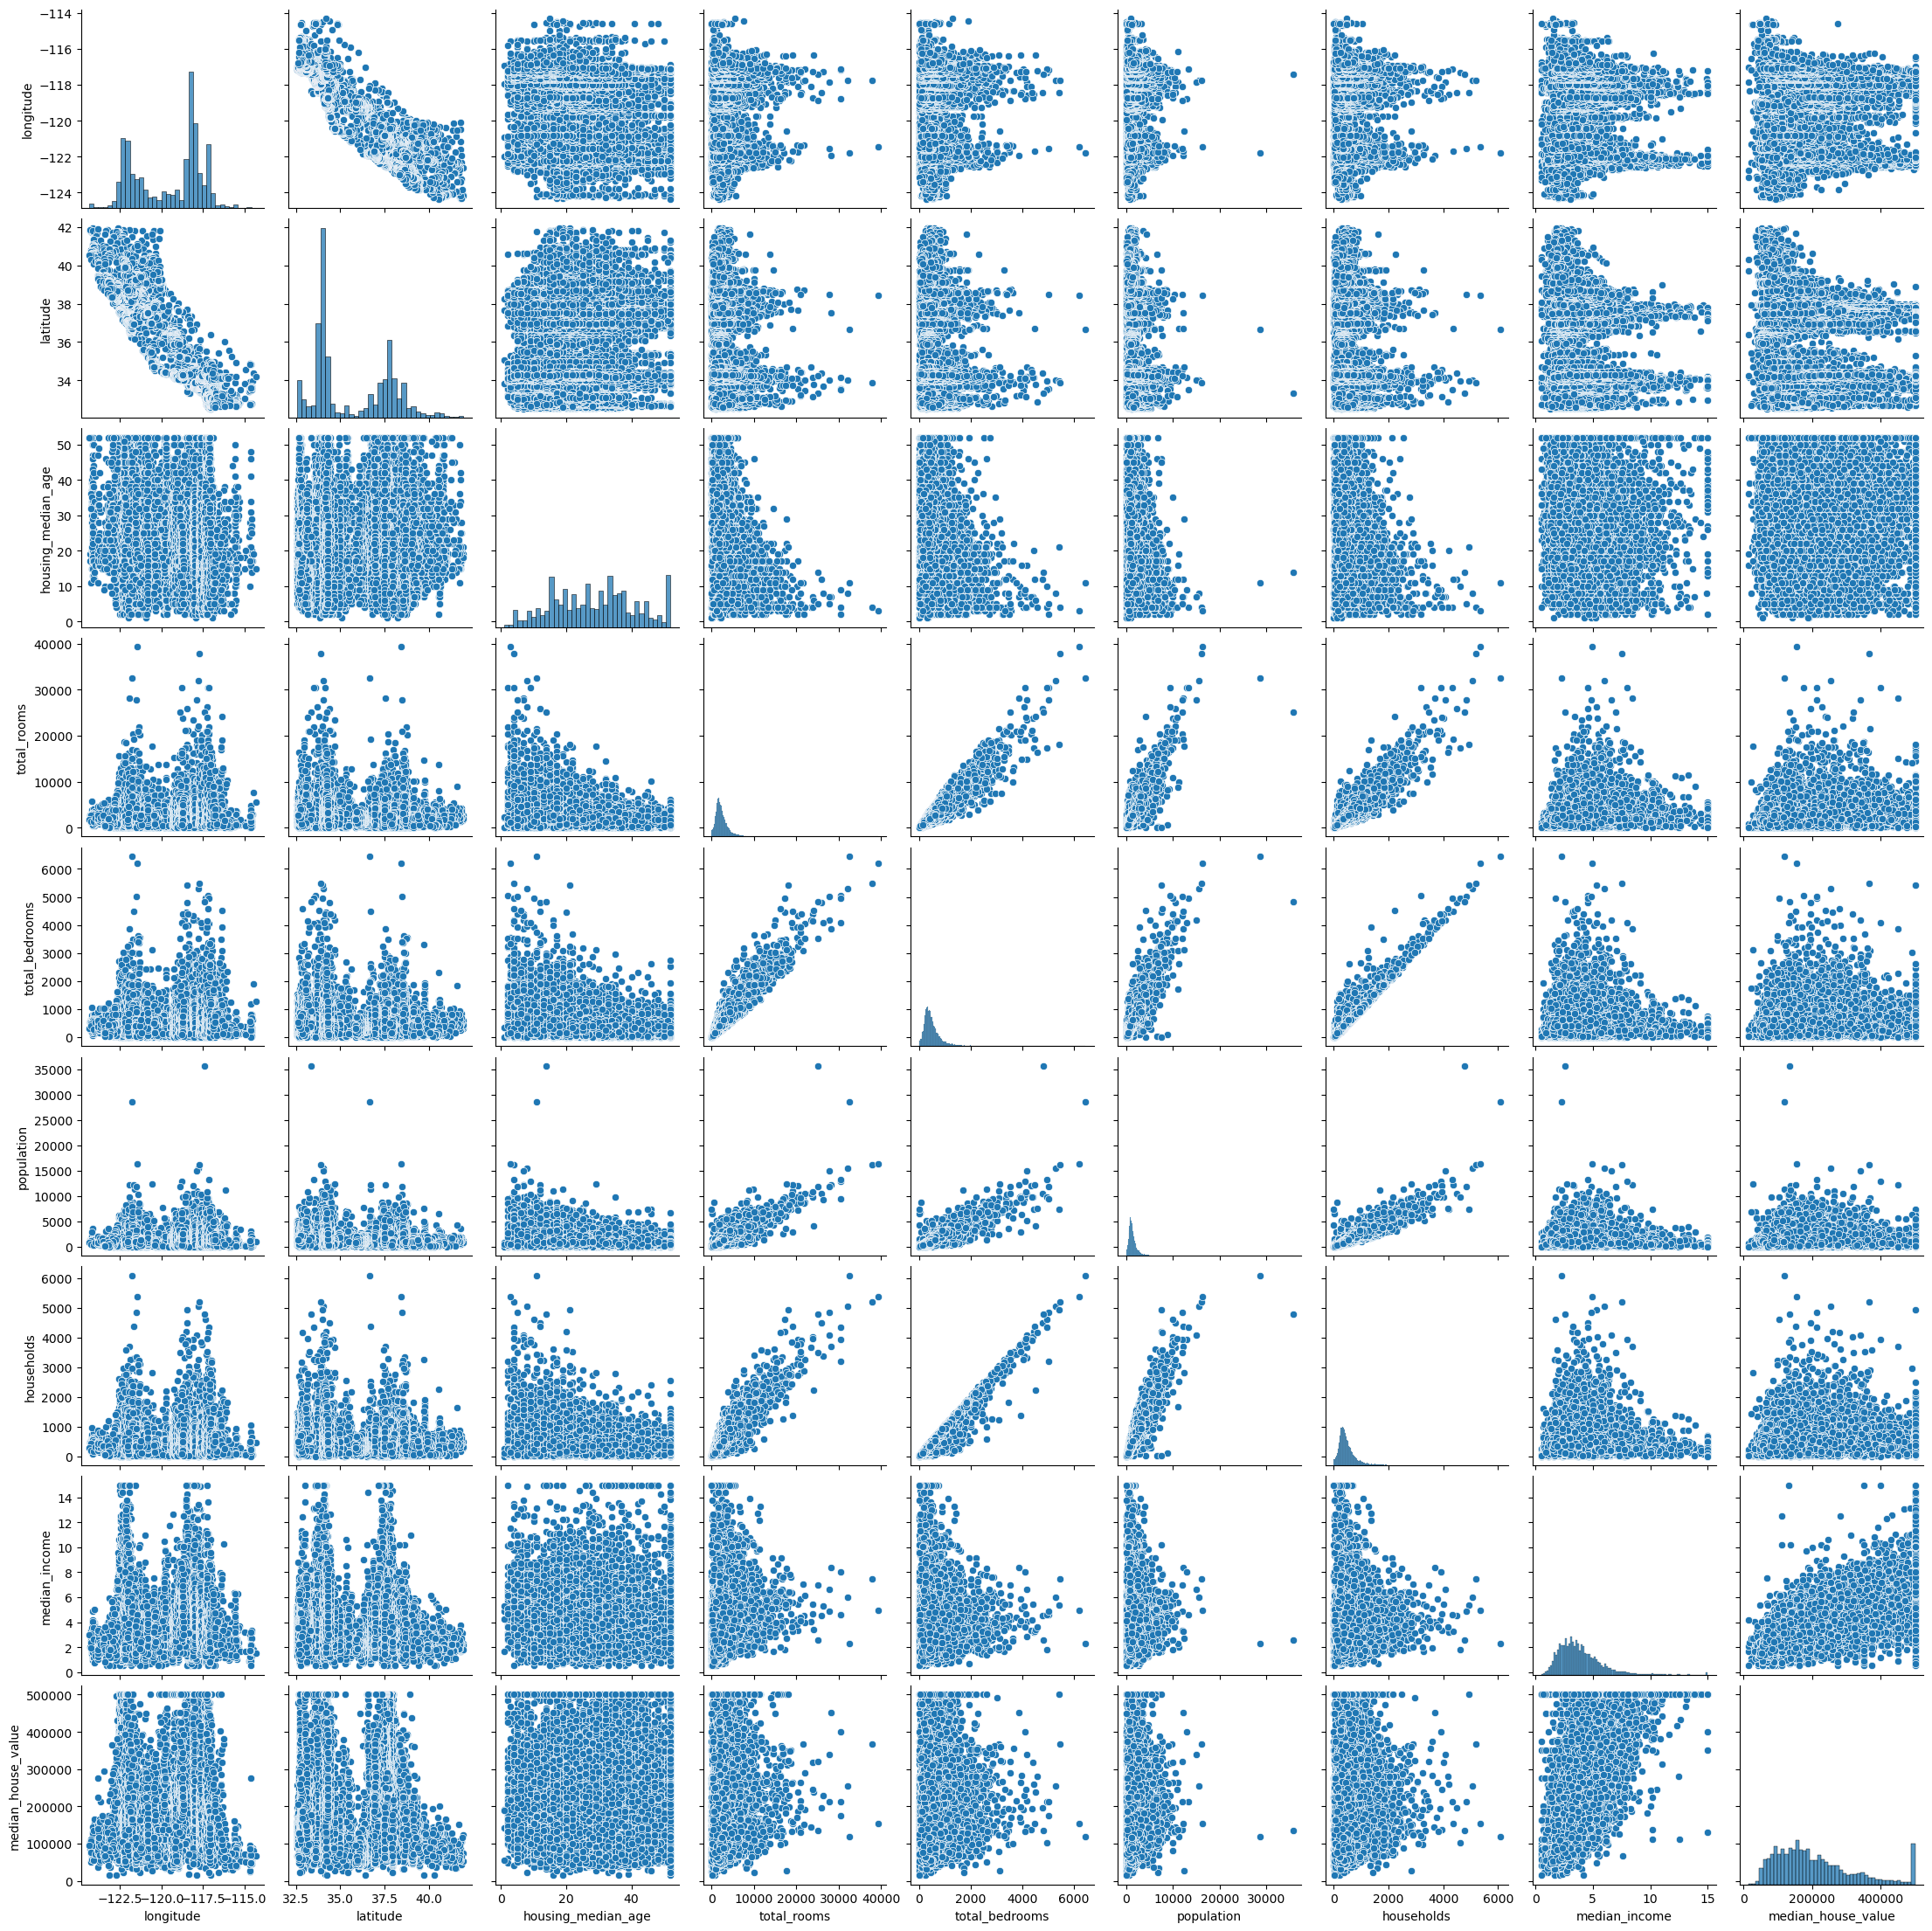

In [107]:
sns.pairplot(housing)
plt.show()

In [130]:
housing.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [138]:
housing.corrwith(housing.median_house_value, numeric_only=True).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
dtype: float64

In [144]:
corr = housing.corrwith(housing.median_house_value, numeric_only=True).sort_values(ascending=False, key=lambda x:abs(x)).iloc[1:]

In [146]:
corr

median_income         0.688075
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
dtype: float64

In [148]:
corr['median_income']

0.6880752079585484

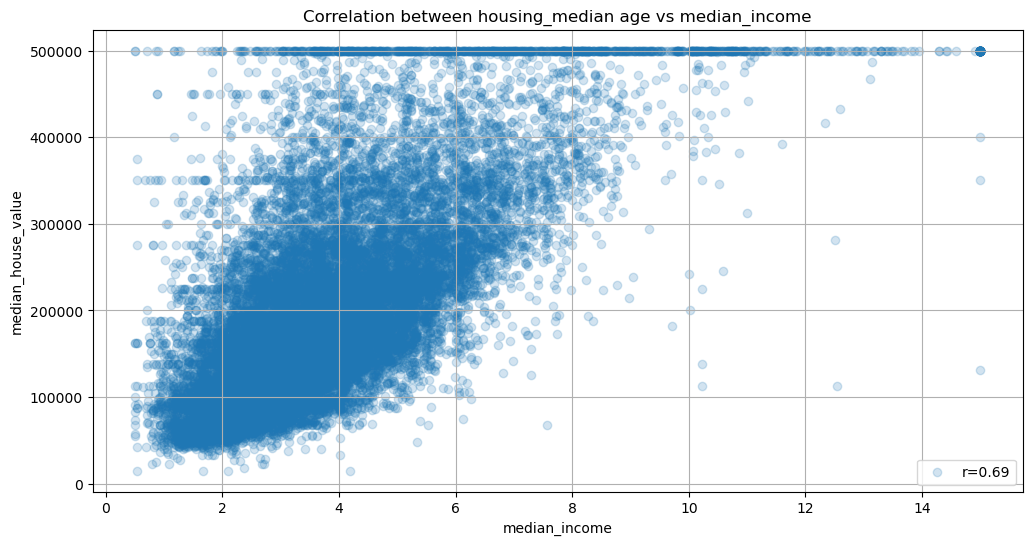

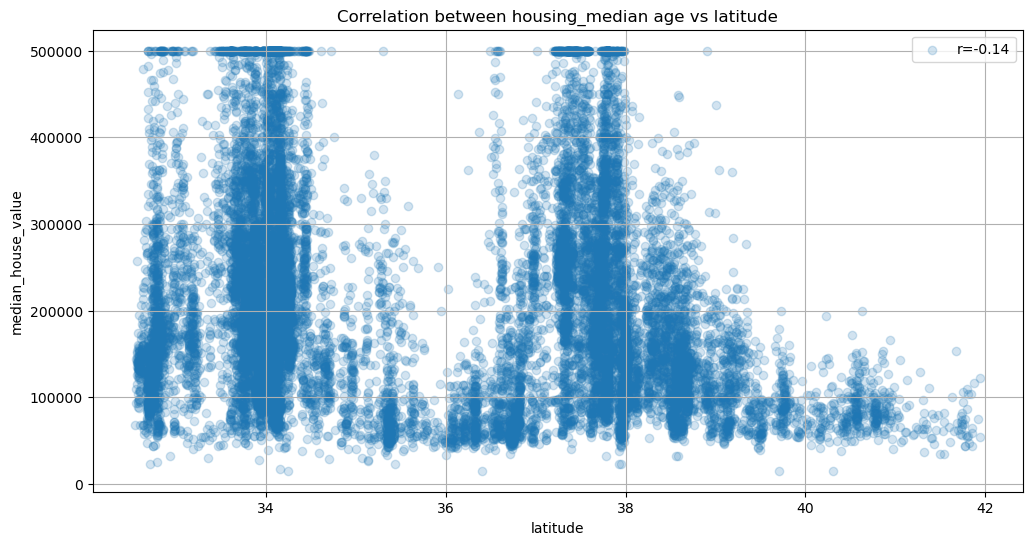

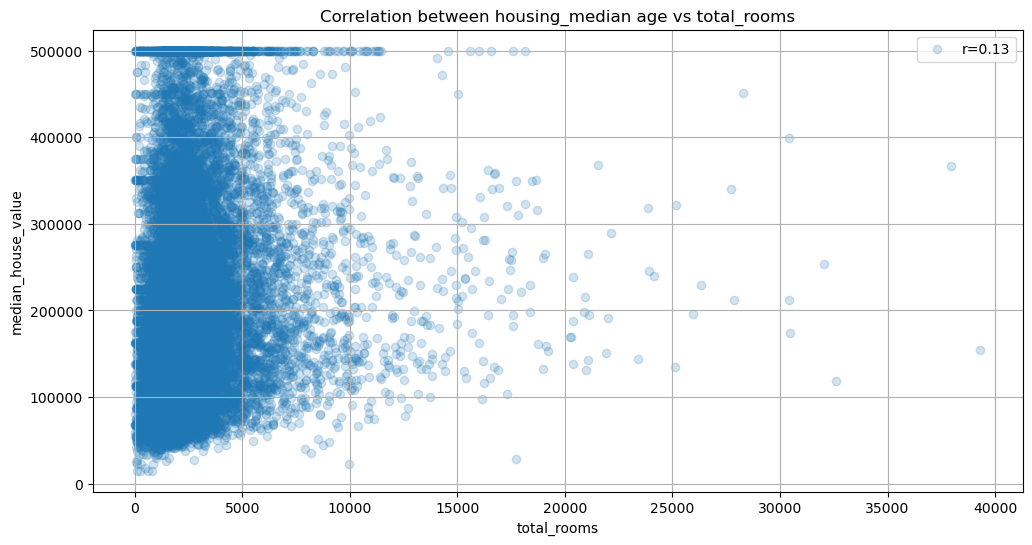

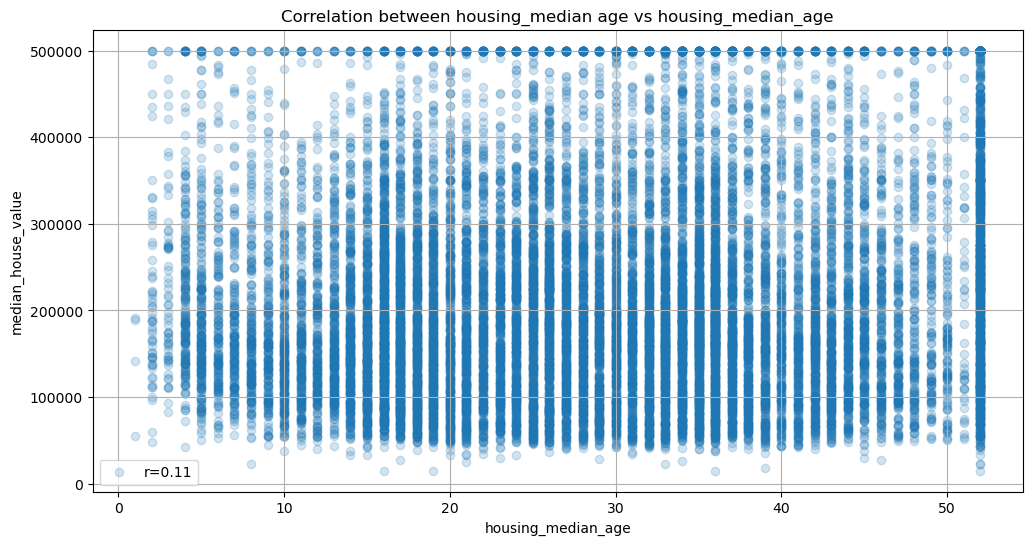

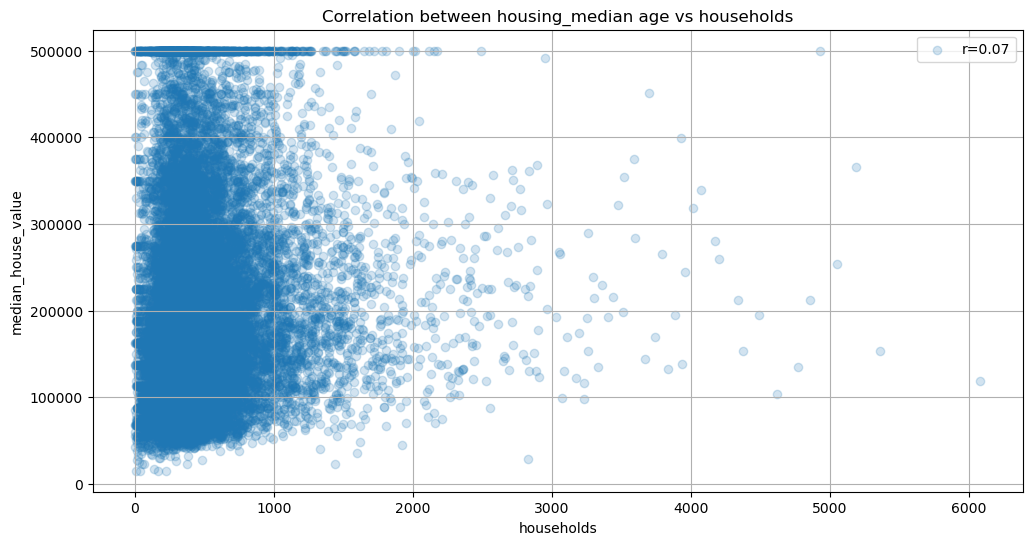

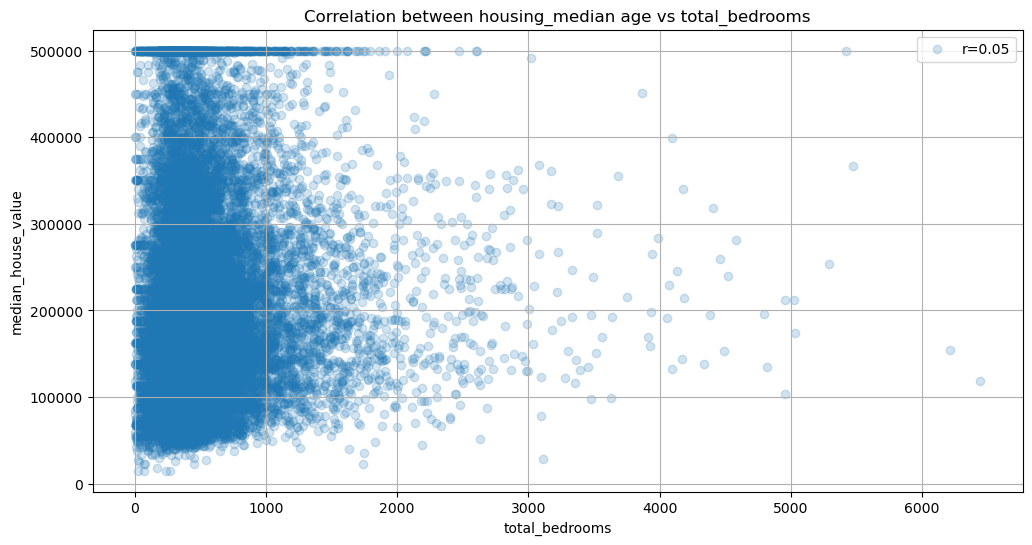

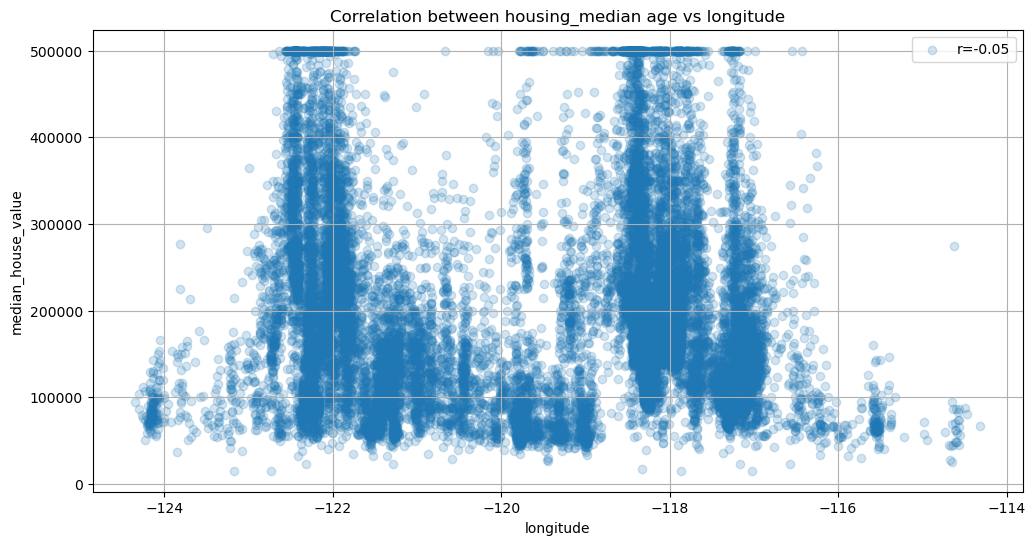

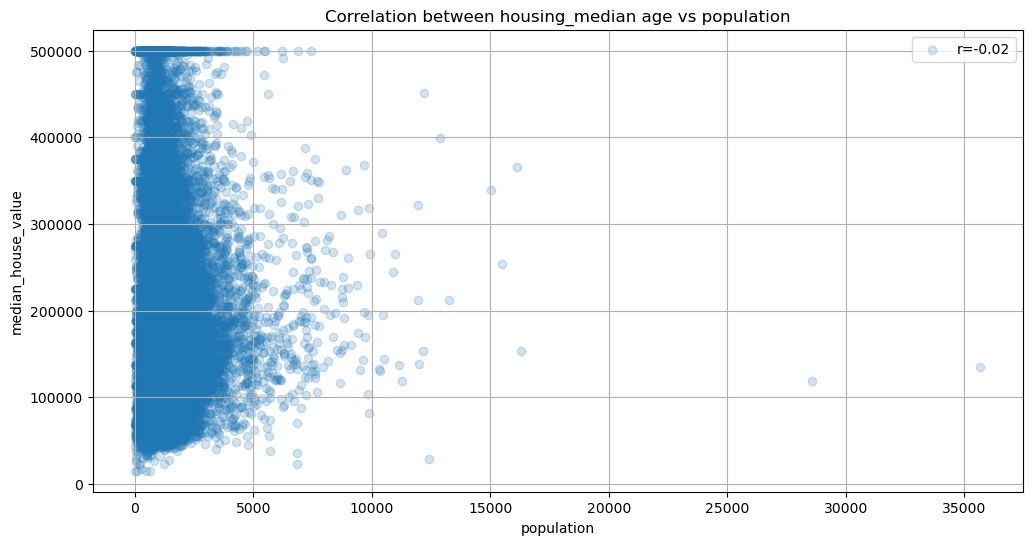

In [158]:
for col in corr.index:
    if col!='median_house_value':
        plt.figure(figsize=(12, 6))
        plt.title(f'Correlation between housing_median age vs {col}')
        plt.scatter(housing[col], housing['median_house_value'], label=f"r={corr[col]:.2f}", alpha=0.2)
        plt.xlabel(col)
        plt.ylabel("median_house_value")
        plt.grid()
        plt.legend()
        plt.show()
        

# 4. Prepare Data for Machine Learning Algorithms 